In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [15]:
iris= load_iris()

In [16]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
unique, counts=np.unique(iris.target_names,return_counts=True)

print( np.asarray((unique, counts)).T)

[['setosa' '1']
 ['versicolor' '1']
 ['virginica' '1']]


In [30]:
data= pd.DataFrame(iris.data)
data.columns=iris.feature_names

In [31]:
data['target']= iris.target
data['target_names']=data['target'].replace({0:'Setosa',1: 'versicolor',2: 'virginica'})
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


###### Balanced Dataset, What if Imbalanced Dataset

In [32]:
data['target_names'].value_counts()

Setosa        50
virginica     50
versicolor    50
Name: target_names, dtype: int64

In [8]:
# pip install imblearn

In [9]:
# conda install -c conda-forge imbalanced-learn

In [10]:
# conda install -c glemaitre imbalanced-learn

###### Basic GroupBy

In [59]:
data.groupby(by='target_names').agg([np.mean,np.std,np.max]).round(1)

sepal length (cm)           sepal width (cm)            \
                          mean  std amax             mean  std amax   
target_names                                                          
Setosa                     5.0  0.4  5.8              3.4  0.4  4.4   
versicolor                 5.9  0.5  7.0              2.8  0.3  3.4   
virginica                  6.6  0.6  7.9              3.0  0.3  3.8   

             petal length (cm)           petal width (cm)           target  \
                          mean  std amax             mean  std amax   mean   
target_names                                                                 
Setosa                     1.5  0.2  1.9              0.2  0.1  0.6      0   
versicolor                 4.3  0.5  5.1              1.3  0.2  1.8      1   
virginica                  5.6  0.6  6.9              2.0  0.3  2.5      2   

                        
              std amax  
target_names            
Setosa        0.0    0  
versicolor    0.0    1  
virginica     0.0    2

###### Normal Distribution of variables

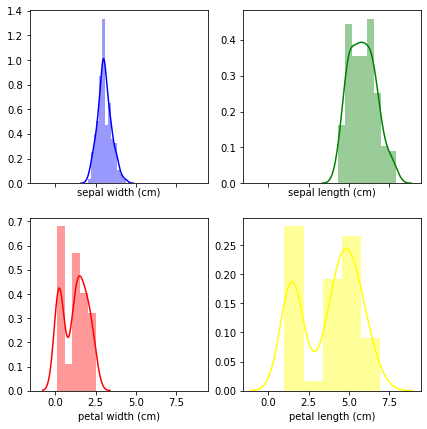

In [54]:
fig,ax=plt.subplots(2,2,figsize=(7,7),sharex= True)
sns.distplot(data['sepal width (cm)'],color='blue',ax=ax[0,0])
sns.distplot(data['sepal length (cm)'],color='green', ax=ax[0,1])
sns.distplot(data['petal width (cm)'],ax=ax[1,0],color='red')
sns.distplot(data['petal length (cm)'],ax=ax[1,1],color='yellow')

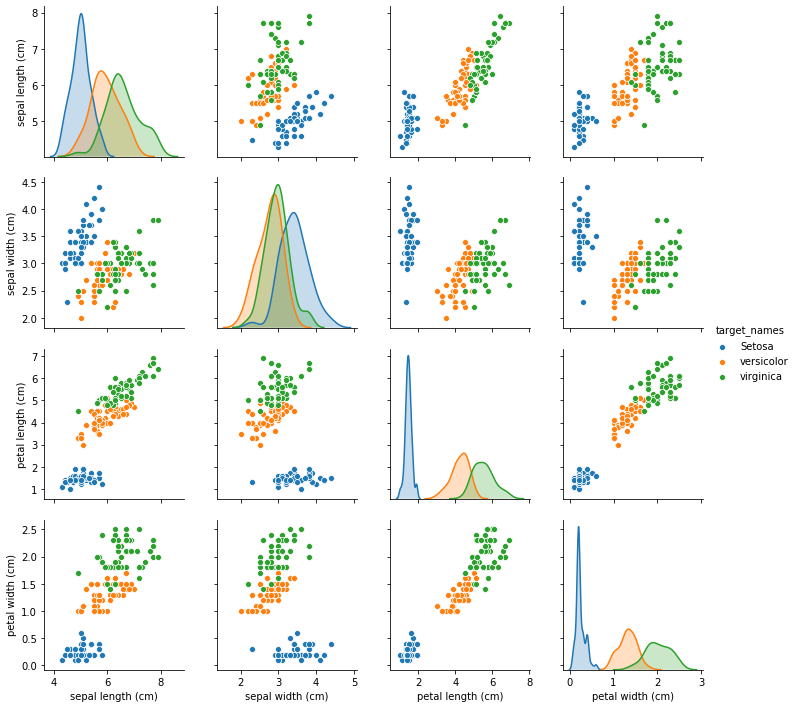

In [55]:
sns.pairplot(data,vars = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],hue='target_names',diag_kind= 'kde' )

###### Missing Values

In [60]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

###### Outliers

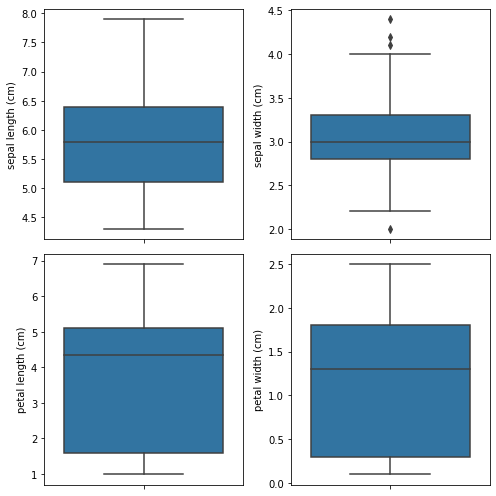

In [84]:
plt.figure(figsize=(7,7))
for i in range(0,4):
    if data[data.columns[i]].dtype==('float64'):
        plt.subplot(2,2,i+1)
        sns.boxplot(data[data.columns[i]],orient='v')
        plt.tight_layout()